In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abdullah/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/abdullah/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/abdullah/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp= spacy.load('en_core_web_sm')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
df= pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
# check for null and missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
pd.set_option('display.max_column',None)


In [13]:
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Prepare data
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Encode labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8812
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
def preprocess_text(text):

    text=re.sub(r'<*?>','',text)  # Remove HTML tags
    text=text.lower()  # Convert to lowercase
    text=re.sub(r'[^a-z\s]','',text)  # Remove non
    tokens= word_tokenize(text)  # Tokenize text
    tokens=[word for word in tokens if word not in stop_words]  # Remove stop
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [22]:
print("preprocessing all 50000 reviews...")
df=df.sample(500).copy()
df["Cleaned_Review"]=df["review"].apply(preprocess_text)
print("preprocessing done.")

print("\n Comparing original and cleaned reviews:")
pd.set_option('display.max_colwidth', None)
display(df[['review', 'Cleaned_Review']].head())

preprocessing all 50000 reviews...
preprocessing done.

 Comparing original and cleaned reviews:


,review,Cleaned_Review
42983,"I thought it was an original story, very nicely told. I think all you people are expecting too much. I mean...it's just a made for television movie! What are you expecting? Some Great wonderful dramtic piece? I thought it was a really great story for a made for television movie....and that's my opinion.",think original story nicely tell think people expect much meanit make television movie expect great wonderful dramtic piece think really great story make television movieand that s opinion
7667,"Another vast conspiracy movie that tries to blame the US government and the Armed Forces (especially the Army) for every disaster since the Great Flood. Anyone who has ever served time in the US military can see how bogus this film is. Uniforms, equipment, sets, and mannerisms are all wrong. (And of course, all Senior Officers are either corrupt criminals or total idiots.) Blatant propaganda with no attempt at objectivity. Most of the theories presented have been disproven over the past few years. Uses every cliche', rumor, and Urban Legend from the Gulf-all are presented as gospel. (The truth is, no one knows for sure why some GW vets are sick and others are healthy as horses.) PS This is not new. War is NOT fun and I know WWII, Korean, and Viet Nam vets with some pretty serious ailments, too. (And the government has the responsibility to take care of all of them.) Sensationalistic movies like this will not solve the problem!",another vast conspiracy movie try blame we government armed force especially army every disaster since great flood anyone ever serve time we military see bogus film uniform equipment set mannerism wrong course senior officer either corrupt criminal total idiot blatant propaganda attempt objectivity theory present disproven past year use every cliche rumor urban legend gulfall present gospel truth one know sure gw vet sick other healthy horse ps new war fun know wwii korean viet nam vet pretty serious ailment government responsibility take care sensationalistic movie like solve problem
17119,"Very interesting to find another reviewer who had the exact same reaction to this movie as I did: It was a heck of a lot better when I was 10 or 11 years old.<br /><br />Seeing it more than 30 years later, it's still okay, but it only mildly held my interest. What seemed hugely funny back then was only mildly amusing.<br /><br />Also, things that were astonishing to me as a 10-year-old came across as just silly. For example, in one scene Trinity is walking along and fires his revolver behind him and kills two men without even looking. In fact, he doesn't even bother to look and see if they're dead, because he knows he hit the mark. Um, yeah, right.<br /><br />In addition, a lot of the dialogue sounds quite wooden. Sorry, but 35 years later, it hasn't really aged that well.<br /><br />Although it's been a long time since I've seen that one as well, probably a better Terrence Hill film than this one would be My Name Is Nobody.",interesting find another reviewer exact reaction movie heck lot well year oldbr br see year later still okay mildly hold interest seem hugely funny back mildly amusingbr br also thing astonish yearold come across silly example one scene trinity walk along fire revolver behind kill two man without even look fact do not even bother look see they re dead know hit mark um yeah rightbr br addition lot dialogue sound quite wooden sorry year later have not really aged wellbr br although long time since I ve see one well probably well terrence hill film one would name nobody
12224,"Alien Express is one of the worst movies I've bothered to experience.<br /><br />The plot is predictable. The aliens look like rubber sock puppets. The effects would have been mediocre in the 70's, but are just atrocious by today's standards. Couldn't they take a shot of a real train instead of using an obvious model?<br /><br />The acting isn't great but, really, the dialogue is the worst part. It gouge

In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1188


In [24]:
# Use the cleaned reviews for training
X = df["Cleaned_Review"]
y = df["sentiment"].map({"positive": 1, "negative": 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize cleaned text
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        49
           1       0.82      0.80      0.81        51

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



In [25]:

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.19


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.81


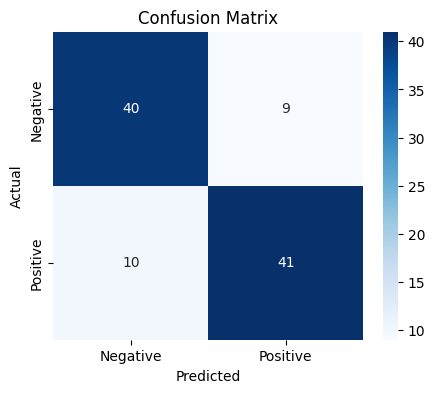

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

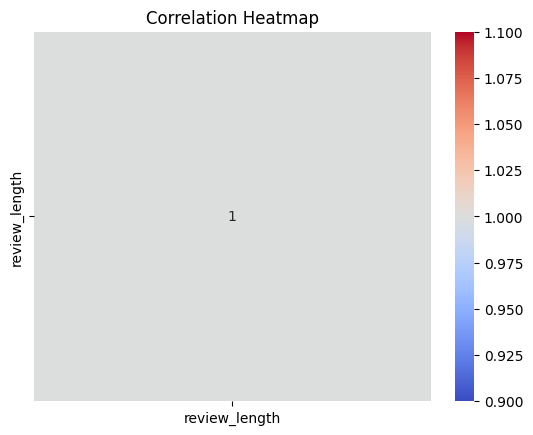

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Add review length as a feature
df['review_length'] = df['review'].apply(len)

# Select only numerical columns
corr = df[['review_length', 'sentiment']].corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Define our features (X) and target (y)
X = df['Cleaned_Review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Training set size: 400
Testing set size: 100
Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [32]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



In [33]:
mse= mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.57


In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.43


Model Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.73      0.78        49
    Positive       0.77      0.86      0.81        51

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



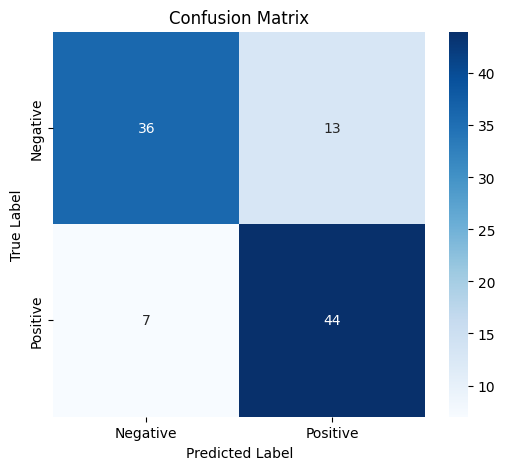

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()